# Part 1: Digit recognition using CNNs


In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Dropout, Flatten
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
import matplotlib.pyplot as plt
import time

## 1. Read your data.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

X_train = X_train / 255 
X_test = X_test / 255

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

## 2. Construct a CNN-based network that best fits the data with good generalization on the test data.

In [3]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [4]:
def custom_cnn_network(loss,optimizer,metrics):

    model = Sequential()
    # 1st Convolutional Layer
    model.add(Convolution2D(filters=96, input_shape=(1,28,28), kernel_size=(11,11),strides=(4,4), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    model.add(BatchNormalization())
    
    # 2nd Convolutional Layer
    model.add(Convolution2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    model.add(BatchNormalization())
    
     # 3rd Convolutional Layer
    model.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    model.add(BatchNormalization())
    
    # 4th Convolutional Layer
    model.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    
    # 5th Convolutional Layer
    model.add(Convolution2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    model.add(BatchNormalization())
    
    # 6th Convolutional Layer
    model.add(Convolution2D(filters=96, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
    model.add(BatchNormalization())
    
    # Passing it to a dense layer
    model.add(Flatten())
    
    # 1st Dense Layer
    model.add(Dense(2000))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    # 2nd Dense Layer
    model.add(Dense(2000))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    # 3rd Dense Layer
    model.add(Dense(4000))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    # 4th Dense Layer
    model.add(Dense(8000))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    
    # Output Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model

In [5]:
model = custom_cnn_network('categorical_crossentropy', optimizers.Adam(lr=0.0001),['accuracy'])
model.summary()

history = model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_split=0.2, shuffle=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 7, 96)          325344    
_________________________________________________________________
activation (Activation)      (None, 1, 7, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 4, 96)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 4, 96)          384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 4, 256)         2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 1, 4, 256)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 2, 256)         0

In [6]:
# Save the entire model as a SavedModel.
!mkdir -p saved_models
model.save('saved_models/custom_cnn.h5') 

## 3. Report the training and test performances of your trained final model.

In [7]:
# compute test accuracy
print ("Accuracy on train data is:", accuracy(X_train, Y_train , model))
print ("Accuracy on test data is:", accuracy(X_test, Y_test , model))

Accuracy on train data is: 99.38666666666667
Accuracy on test data is: 98.09


In [8]:
def show_history(history):  #train ve validation datası için accuracy ve loss grafiklerini çiz  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

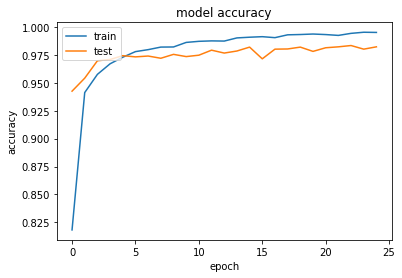

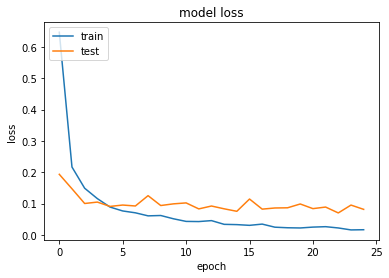

In [9]:
show_history(history)

# Part 2: Input optimization for a CNN

In [10]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import pylab as plt
import numpy as np
from keras import backend as K
from keras.models import load_model
from keras.datasets import mnist
from keras.utils import np_utils
from past.builtins import xrange
from skimage.util import random_noise

## 1. Read your data. / 2. Load your model from the first part.

In [11]:
img_width, img_height = 28,28 

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

X_train = X_train / 255 
X_test = X_test / 255

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
np.where(Y_test == 1)[1][0]

7

In [14]:
custom_cnn = load_model('saved_models/custom_cnn.h5')

## 3. For the output [0,1,0,0,0,0,0,0,0,0] (i.e., digit 1):

In [36]:
def gradient_descent(model, img, output_class):

    # get output of last layer
    output = model.layers[-1].output

    loss = K.mean(output[:,output_class]) # get the average activation of our desired class over the batch
    
    grads = K.gradients(loss, model.input)[0] # the output of `gradients` is a list, just take the first (and only) element
    
    grads = K.l2_normalize(grads) # normalize the gradients to help having an smooth optimization process
    
    func = K.function([model.input], [loss, grads, output])
    
    lr = 1.  # learning rate used for gradient updates
    max_iter = 50  # number of gradient updates iterations
    losses = []
    for i in range(max_iter):
        loss_val, grads_val, output = func([img])
        # print("---------------")
        losses.append("{:.10f}".format(loss_val))

        for i in xrange(img[0][0].shape[0]):
            for j in xrange(img[0][0].shape[1]):
                if img[0][0][i][j]<0.5 and grads_val[0][0][i][j]<0:
                    img[0][0][i][j] -= grads_val[0][0][i][j] * lr
                elif img[0][0][i][j]>0.5 and grads_val[0][0][i][j]>0:
                    img[0][0][i][j] += grads_val[0][0][i][j] * lr

                img[0][0] = (img[0][0] - np.min(img[0][0])) / (np.max(img[0][0]) - np.min(img[0][0]))

    print("--Generated image--")
    plt.imshow(img[0][0], cmap='gray')
    plt.show()

    return img, losses

**Feed the random image to the model. Try to minimize the error in the output by continuously updating the input image using gradient descent. For this you need to write a proper loss function along with some constraints for regularization (image pixel values to stay within the interval [0,1]). Report the best image found for this. Try this for a few iterations of the random image to see how the optimization is affected by the initial choice of the image.**

In [16]:
def generate_random_image():
    print("--Random image--")
    rnd_img = np.random.random(size=(img_width,img_height))  
    plt.imshow(rnd_img, cmap='gray')
    plt.show()
    rnd_img = rnd_img.reshape(1,1, img_width, img_height).astype('float32')  
    return rnd_img

--Random image--


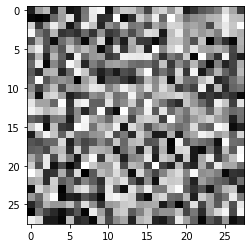

In [37]:
rnd_img = generate_random_image()

In [38]:
pred = custom_cnn.predict(rnd_img)
print(pred)

[[7.4357777e-06 3.1366778e-04 2.9844776e-05 4.5544034e-06 6.8762522e-05
  9.6387448e-05 6.6451132e-05 3.9395629e-05 9.9933136e-01 4.2201744e-05]]


--Generated image--


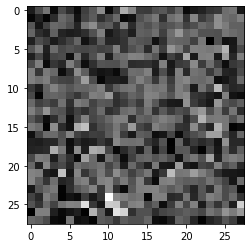

Loss for each iteration:
 ['0.0003136678', '0.0004546538', '0.0005957701', '0.0006233145', '0.0005896181', '0.0003693686', '0.0001658322', '0.0000702464', '0.0000120334', '0.0000013379', '0.0000001293', '0.0000000025', '0.0000000022', '0.0000000020', '0.0000000018', '0.0000000017', '0.0000000015', '0.0000000014', '0.0000000013', '0.0000000013', '0.0000000012', '0.0000000011', '0.0000000011', '0.0000000010', '0.0000000010', '0.0000000009', '0.0000000009', '0.0000000008', '0.0000000008', '0.0000000008', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000004']


In [39]:
gen_img, losses = gradient_descent(custom_cnn, rnd_img, 1)
print("Loss for each iteration:\n", losses)

In [40]:
pred = custom_cnn.predict(gen_img)
print(pred)

[[5.1220417e-10 4.3977669e-10 6.7029351e-12 2.3391024e-12 1.9112432e-09
  1.1408028e-09 5.7673246e-12 5.0776033e-12 1.0000000e+00 5.3481608e-10]]


**Try using an actual image of the digit with noise added as the initial image. Report the results.**

In [41]:
def get_actual_image(image_index):
    index = np.where(y_test == image_index)[0][0]
    actual_img = X_test[index].reshape(1,1, img_width, img_height).astype('float32')
    print("--Example from MNSIT--")
    plt.imshow(actual_img[0][0], cmap='gray')
    plt.show()

    # add salt/paper noise to images
    for idx in range(len(actual_img)):
        # X[idx] = sp_noise(X[idx],0.01)
        actual_img[0][0] = random_noise(actual_img[0][0] , mode='s&p',amount=0.1)

    print("Gray scaled - noise added image example:")
    plt.imshow(actual_img[0][0] , cmap='gray')
    plt.show()

    return actual_img

--Example from MNSIT--


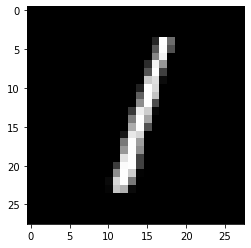

Gray scaled - noise added image example:


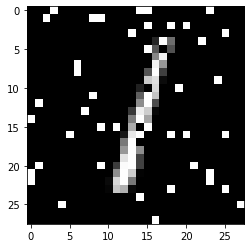

In [42]:
actual_img = get_actual_image(1)

In [43]:
pred = custom_cnn.predict(actual_img)
print("{:.10f}".format(pred))

[[1.14958006e-04 9.04287755e-01 9.35583469e-03 1.12178025e-03
  7.86157604e-03 3.37862340e-03 9.35685169e-03 7.72662752e-05
  6.44340590e-02 1.13808319e-05]]


--Generated image--


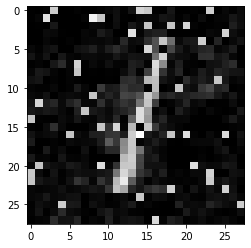

Loss for each iteration:
 ['0.9042877555', '0.0014349511', '0.0000071184', '0.0000000298', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000']


In [44]:
gen_img, losses = gradient_descent(custom_cnn, actual_img, 1)
print("Loss for each iteration:\n", losses)

In [48]:
pred = custom_cnn.predict(gen_img)
print("{:.10f}".format(pred))

TypeError: ignored

## 4. Try the previous step for: All the other digits. 

Input 0
--Generated image--


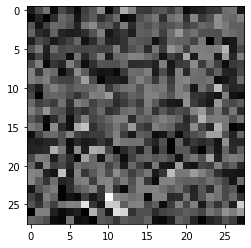

Loss for each iteration:
 ['0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004']
Input 1
--Generated image--


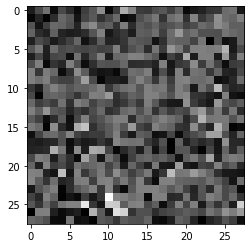

Loss for each iteration:
 ['0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002']
Input 2
--Generated image--


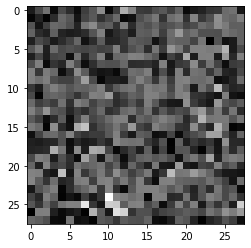

Loss for each iteration:
 ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000']
Input 3
--Generated image--


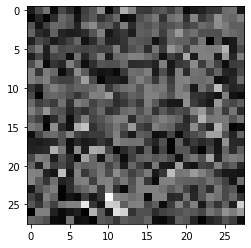

Loss for each iteration:
 ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000']
Input 4
--Generated image--


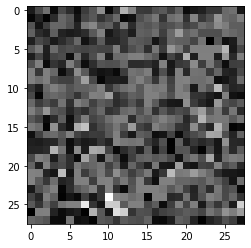

Loss for each iteration:
 ['0.0000000010', '0.0000000010', '0.0000000009', '0.0000000009', '0.0000000009', '0.0000000009', '0.0000000008', '0.0000000008', '0.0000000008', '0.0000000008', '0.0000000008', '0.0000000008', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000004', '0.0000000004', '0.0000000004']
Input 5
--Generated image--


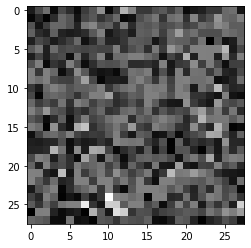

Loss for each iteration:
 ['0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002']
Input 6
--Generated image--


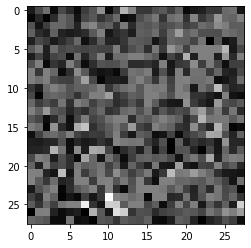

Loss for each iteration:
 ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000']
Input 7
--Generated image--


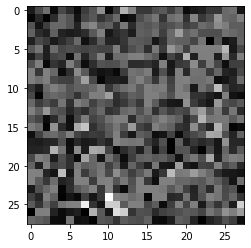

Loss for each iteration:
 ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000']
Input 8
--Generated image--


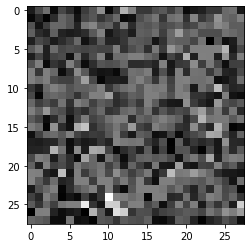

Loss for each iteration:
 ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
Input 9
--Generated image--


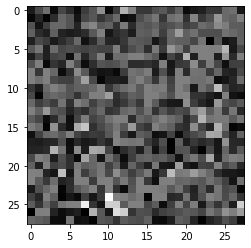

Loss for each iteration:
 ['0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001']


In [46]:
for i in range(0,10):
    print("Input " + str(i))
    gen_img, losses = gradient_descent(custom_cnn, rnd_img, i)
    print("Loss for each iteration:\n", losses)

Input 0
--Example from MNSIT--


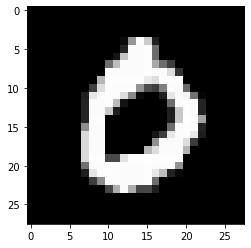

Gray scaled - noise added image example:


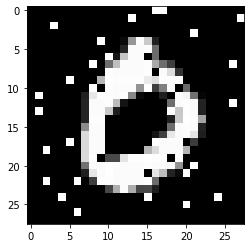

--Generated image--


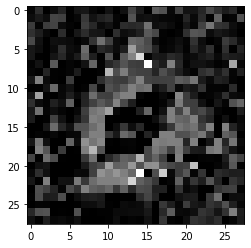

Loss for each iteration:
 ['0.9999648333', '0.9998896122', '0.9996860027', '0.9990701079', '0.9955822825', '0.9743410945', '0.5674776435', '0.0215769373', '0.0001885937', '0.0000099647', '0.0000021365', '0.0000006014', '0.0000002133', '0.0000000674', '0.0000000533', '0.0000000367', '0.0000000336', '0.0000000238', '0.0000000207', '0.0000000194', '0.0000000160', '0.0000000141', '0.0000000129', '0.0000000119', '0.0000000107', '0.0000000099', '0.0000000090', '0.0000000083', '0.0000000077', '0.0000000073', '0.0000000067', '0.0000000064', '0.0000000060', '0.0000000057', '0.0000000054', '0.0000000052', '0.0000000049', '0.0000000048', '0.0000000046', '0.0000000043', '0.0000000042', '0.0000000040', '0.0000000039', '0.0000000037', '0.0000000036', '0.0000000034', '0.0000000033', '0.0000000032', '0.0000000031', '0.0000000030']
Input 1
--Example from MNSIT--


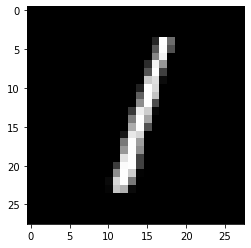

Gray scaled - noise added image example:


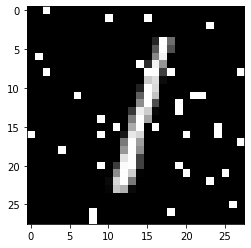

--Generated image--


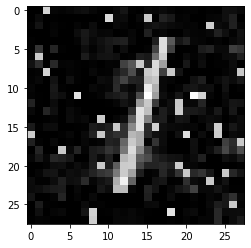

Loss for each iteration:
 ['0.9776251316', '0.0932279527', '0.0003809379', '0.0000002870', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000']
Input 2
--Example from MNSIT--


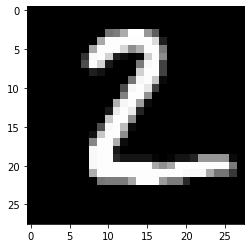

Gray scaled - noise added image example:


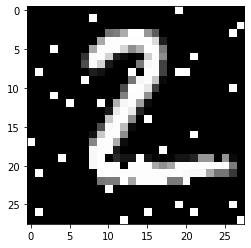

--Generated image--


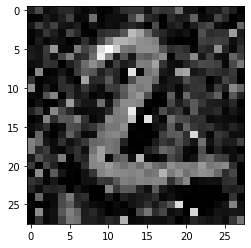

Loss for each iteration:
 ['0.9999995232', '0.9998966455', '0.9938496947', '0.0009942604', '0.0000348040', '0.0000075727', '0.0000037721', '0.0000019807', '0.0000013708', '0.0000009182', '0.0000006539', '0.0000005035', '0.0000002750', '0.0000000515', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000']
Input 3
--Example from MNSIT--


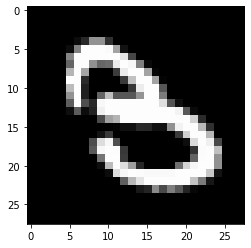

Gray scaled - noise added image example:


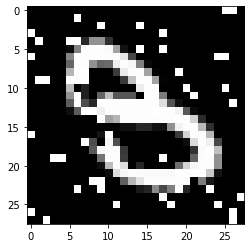

--Generated image--


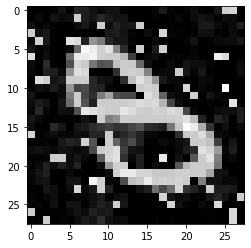

Loss for each iteration:
 ['0.3633757234', '0.0000137287', '0.0000000029', '0.0000000016', '0.0000000012', '0.0000000010', '0.0000000009', '0.0000000008', '0.0000000007', '0.0000000006', '0.0000000006', '0.0000000005', '0.0000000005', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001']
Input 4
--Example from MNSIT--


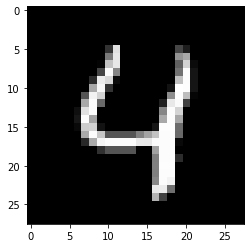

Gray scaled - noise added image example:


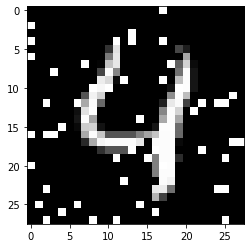

--Generated image--


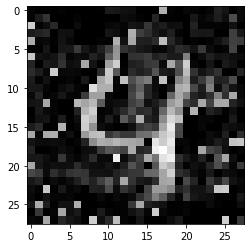

Loss for each iteration:
 ['0.9978618026', '0.5905073285', '0.0016965122', '0.0000474680', '0.0000025656', '0.0000001381', '0.0000000074', '0.0000000041', '0.0000000030', '0.0000000023', '0.0000000019', '0.0000000016', '0.0000000015', '0.0000000013', '0.0000000012', '0.0000000010', '0.0000000010', '0.0000000009', '0.0000000008', '0.0000000008', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003']
Input 5
--Example from MNSIT--


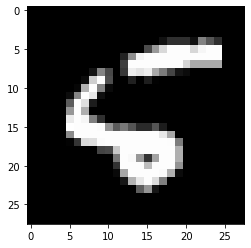

Gray scaled - noise added image example:


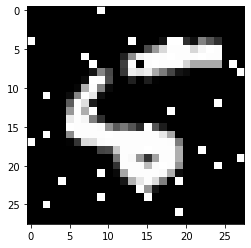

--Generated image--


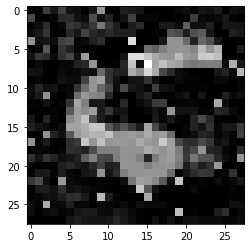

Loss for each iteration:
 ['0.9902518988', '0.0072110170', '0.0000762115', '0.0000066588', '0.0000006717', '0.0000000360', '0.0000000086', '0.0000000048', '0.0000000034', '0.0000000027', '0.0000000022', '0.0000000020', '0.0000000018', '0.0000000016', '0.0000000015', '0.0000000014', '0.0000000013', '0.0000000012', '0.0000000011', '0.0000000010', '0.0000000010', '0.0000000009', '0.0000000009', '0.0000000008', '0.0000000008', '0.0000000008', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004']
Input 6
--Example from MNSIT--


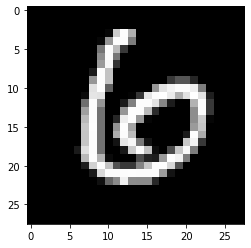

Gray scaled - noise added image example:


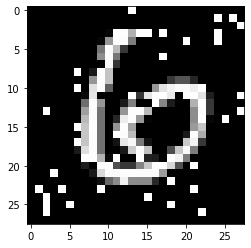

--Generated image--


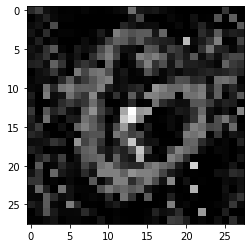

Loss for each iteration:
 ['0.9994145632', '0.4078074396', '0.0002879372', '0.0000104423', '0.0000021680', '0.0000011074', '0.0000006165', '0.0000004042', '0.0000002691', '0.0000001744', '0.0000001229', '0.0000000933', '0.0000000676', '0.0000000547', '0.0000000448', '0.0000000361', '0.0000000281', '0.0000000192', '0.0000000085', '0.0000000037', '0.0000000018', '0.0000000011', '0.0000000007', '0.0000000005', '0.0000000004', '0.0000000003', '0.0000000003', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001']
Input 7
--Example from MNSIT--


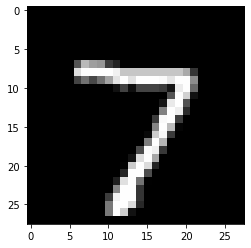

Gray scaled - noise added image example:


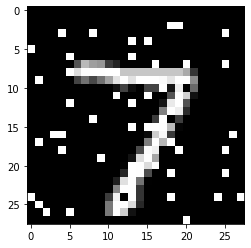

--Generated image--


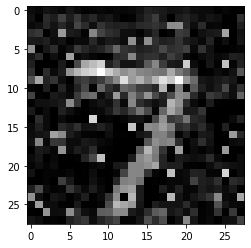

Loss for each iteration:
 ['0.9999684095', '0.9993995428', '0.8905035853', '0.0321972221', '0.0016612952', '0.0001399930', '0.0000028159', '0.0000001442', '0.0000000171', '0.0000000039', '0.0000000027', '0.0000000021', '0.0000000017', '0.0000000015', '0.0000000013', '0.0000000012', '0.0000000011', '0.0000000010', '0.0000000009', '0.0000000008', '0.0000000008', '0.0000000007', '0.0000000007', '0.0000000007', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003']
Input 8
--Example from MNSIT--


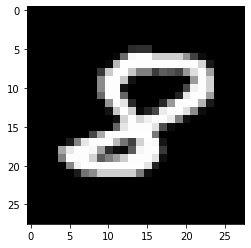

Gray scaled - noise added image example:


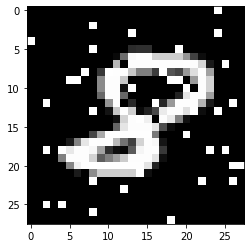

--Generated image--


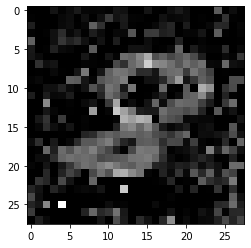

Loss for each iteration:
 ['0.9986392856', '0.9931038022', '0.9683310986', '0.7562069893', '0.0457336120', '0.0022884086', '0.0002845018', '0.0000327320', '0.0000007955', '0.0000000096', '0.0000000014', '0.0000000010', '0.0000000008', '0.0000000006', '0.0000000005', '0.0000000005', '0.0000000004', '0.0000000004', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000002', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001', '0.0000000001']
Input 9
--Example from MNSIT--


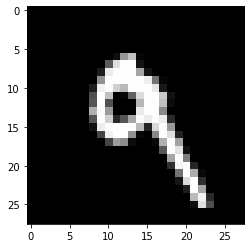

Gray scaled - noise added image example:


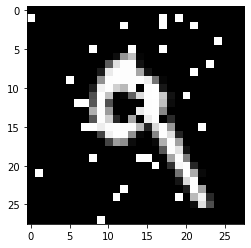

--Generated image--


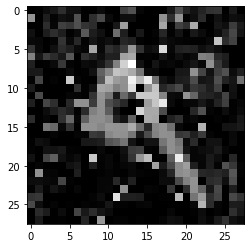

Loss for each iteration:
 ['0.9981334805', '0.0219870545', '0.0005420233', '0.0001007820', '0.0000232051', '0.0000028977', '0.0000003650', '0.0000000156', '0.0000000049', '0.0000000032', '0.0000000024', '0.0000000020', '0.0000000016', '0.0000000014', '0.0000000013', '0.0000000011', '0.0000000010', '0.0000000010', '0.0000000009', '0.0000000008', '0.0000000008', '0.0000000007', '0.0000000007', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000006', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000005', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000004', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003', '0.0000000003']


In [47]:
for i in range(0,10):
    print("Input " + str(i))
    actual_img = get_actual_image(i)
    gen_img, losses = gradient_descent(custom_cnn, actual_img, i)
    print("Loss for each iteration:\n", losses)